In [40]:
units_used = [754, 244, 604, 410, 265, 417, 255, 525, 694, 647, 352, 150, 699, 580, 565]
elec_bill = [2053.91, 739.93, 1658.78, 1169.47, 780.63, 1191.02, 751.77, 1445.15, 1903.94, 1786.19, 1008.49, 487.22, 1850.46, 1602.69, 1563.45]
n = len(units_used)

total1 = total2 = 0

for val in units_used:
    total1 += val

for val in elec_bill:
    total2 += val

mean1 = total1 / n
mean2 = total2 / n

sqd_diffs1 = [(x-mean1)**2 for x in units_used]
sqd_diffs2 = [(y-mean2)**2 for y in elec_bill]

var1 = sum(sqd_diffs1) / n
var2 = sum(sqd_diffs2) / n

std_dev1 = (var1)**0.5
std_dev2 = (var2)**0.5

sum_diffs_mul = sum((x-mean1) * (y-mean2) for x,y in zip(units_used,elec_bill))
covariance = sum_diffs_mul / n

correlation = covariance / (std_dev1 * std_dev2)

def reg_coeff(covariance,var1,mean1,mean2):
    slope = covariance / var1
    intercept = mean2 - slope * mean1
    return intercept,slope

def cov_matrix(var1,var2,covariance):
    return [[var1,covariance],[var2,covariance]]
   
print(f"Mean of units_used: {mean1:.2f}")
print(f"Mean of electricity bill: {mean2:.2f}")
print(f"Variance of units_used: {var1:.2f}")
print(f"Variance of electricity bill: {var2:.2f}")
print(f"Standard Deviation of units_used: {std_dev1:.2f}")
print(f"Standard Deviation of electricity bill: {std_dev2:.2f}")
print(f"Covariance: {covariance:.2f}")
print(f"Correlation: {correlation:.2f}")

#slope, intercept = reg_coeff(covariance,var1,mean1,mean2)
#print(f"Slope = {slope:.2f}, Intercept = {intercept:.2f}")

Mean of units_used: 477.40
Mean of electricity bill: 1332.87
Variance of units_used: 34529.71
Variance of electricity bill: 228373.57
Standard Deviation of units_used: 185.82
Standard Deviation of electricity bill: 477.88
Covariance: 88750.01
Correlation: 1.00


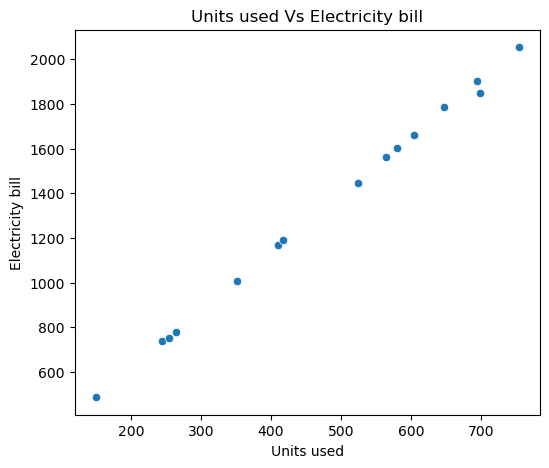

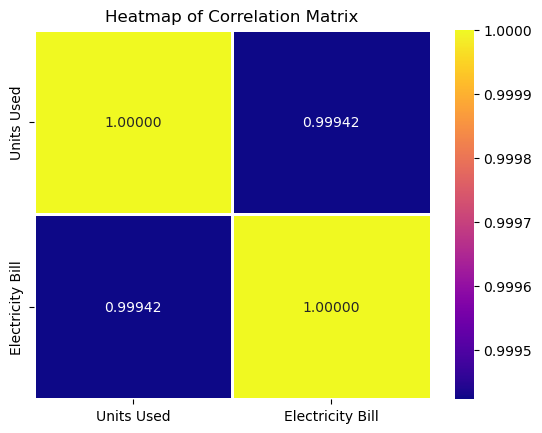

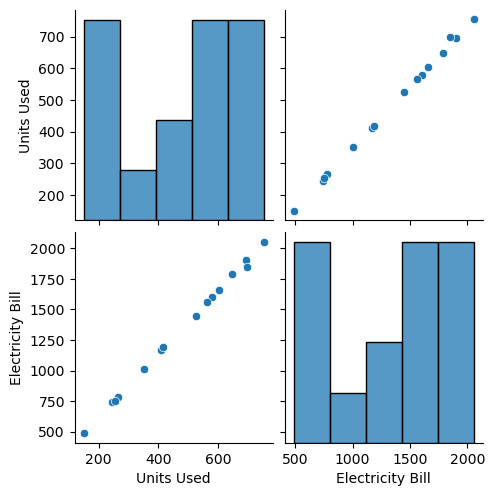

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({ 'Units Used': units_used, 'Electricity Bill': elec_bill})

plt.figure(figsize=(6,5))
sns.scatterplot(x = 'Units Used', y = 'Electricity Bill', data = df)
plt.title("Units used Vs Electricity bill")
plt.xlabel("Units used")
plt.ylabel("Electricity bill")
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='plasma', fmt=".5f", linewidth='1')
plt.title("Heatmap of Correlation Matrix")
plt.show()

sns.pairplot(df)
plt.show()

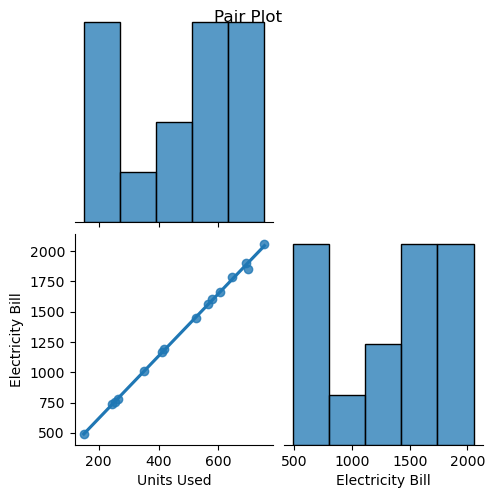

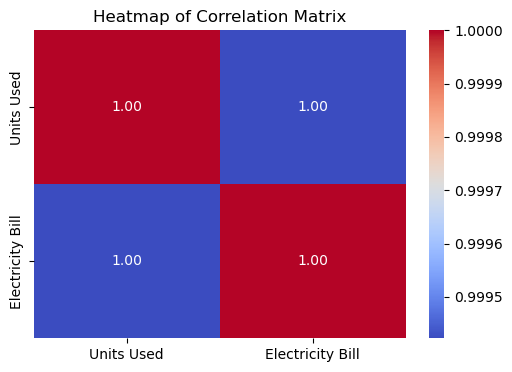

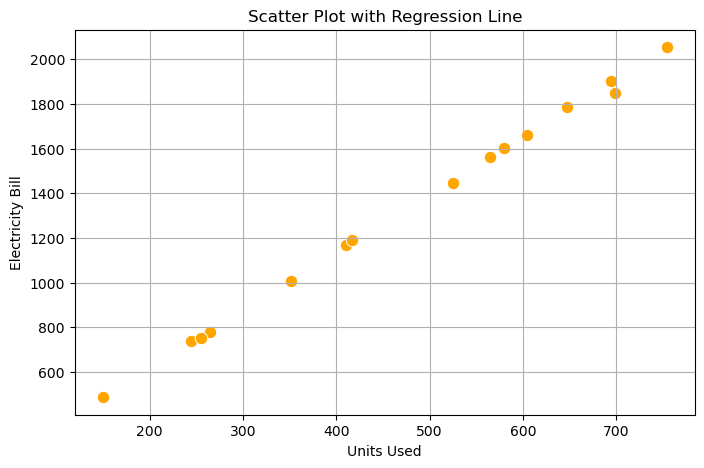

In [20]:

# 1. Pair Plot
sns.pairplot(df, kind='reg', corner=True)
plt.suptitle("Pair Plot")
plt.show()